# Kings County Washington State Housing Prices

### Overview

When you are buying or selling the house, what are the key factors that would determine the price of the house? According to inman.com, there are 6 factors that influence home values: historical sale prices, neighborhood, the market, size and appeal, age and condition, and nearby features. 

As a family of military members, it is very stressful to find home every time when you have to move due to PCS (permanent change of station). Since most of us are new to the location, we can only find out through listed housing prices on the websites. (write more about how to get best house price considering all of the things)

## Data Preparation

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

#scientific notation
pd.set_option('display.float_format', lambda x: '%1f' % x)

In [2]:
df = pd.read_csv(os.path.join("../", "data", "kc_house_data.csv"))

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000000,3,1.000000,1180,5650,1.000000,nan,0.000000,...,7,1180,0.0,1955,0.000000,98178,47.511200,-122.257000,1340,5650
1,6414100192,12/9/2014,538000.000000,3,2.250000,2570,7242,2.000000,0.000000,0.000000,...,7,2170,400.0,1951,1991.000000,98125,47.721000,-122.319000,1690,7639
2,5631500400,2/25/2015,180000.000000,2,1.000000,770,10000,1.000000,0.000000,0.000000,...,6,770,0.0,1933,nan,98028,47.737900,-122.233000,2720,8062
3,2487200875,12/9/2014,604000.000000,4,3.000000,1960,5000,1.000000,0.000000,0.000000,...,7,1050,910.0,1965,0.000000,98136,47.520800,-122.393000,1360,5000
4,1954400510,2/18/2015,510000.000000,3,2.000000,1680,8080,1.000000,0.000000,0.000000,...,8,1680,0.0,1987,0.000000,98074,47.616800,-122.045000,1800,7503


In [4]:
df.shape
#This dataset has 21 categories and 21597 houses that are listed

(21597, 21)

In [5]:
df.columns.to_list()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [6]:
#Inspecting dataset for types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Observations:**
1. 'waterfront', 'view', 'yr_renovated' seems like it has missing values. (non-null counts are less than total rows)
2. 'sqft_basement' dtype is object. In this column, it might have characters that are not numbers. 

In [7]:
#Checking for any null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There are three columns with missing values. 
1. 'waterfront' - see if it affects the 'price'
2. 'view' - small enough to drop rows(0.29% of the data)
3. 'yr_renovated' - see if it affects the 'price'

In [8]:
#droping missing values from 'view'
df.dropna(subset=['view'], inplace=True)

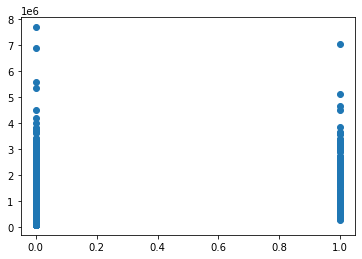

In [9]:
#see if waterfront affect the price
plt.scatter(df.waterfront, df.price)

In [10]:
#see the range of years
df.yr_renovated.value_counts()

0.000000       16961
2014.000000       73
2003.000000       31
2013.000000       31
2007.000000       30
               ...  
1946.000000        1
1959.000000        1
1971.000000        1
1951.000000        1
1954.000000        1
Name: yr_renovated, Length: 70, dtype: int64

It seems like there are 70 renovated year and 17011 are actually 0s

(0.0, 8000000.0)

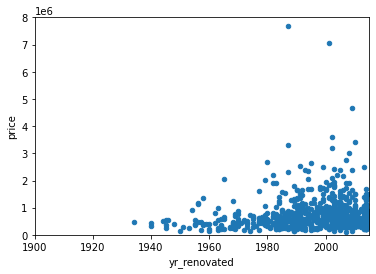

In [11]:
df.plot.scatter(x='yr_renovated', y='price')
plt.xlim(1900, 2015) #found this range from df.describe
plt.ylim(0, 8000000)

From the scatter plot for 'yr_renovated'and 'price', it seems like yr_renovated affect price slightly. Not significant enough. Also, it does not have anough enough years to evaluate since majority of the values were 0s (79% of the yr_renovated was actually 0)

In [12]:
#Decided to drop these columns
df1 = df.drop(columns = ['waterfront', 'yr_renovated', 'id'])

In [13]:
#checking to see if new df has any null value(shouldn't have any)
df1.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
df1.shape

(21534, 18)

In [15]:
#Placing target value as first column 
df1 = df1.set_index('price').reset_index()

In [16]:
df1 = df1.sort_values(by=['price'], ascending = False)

In [17]:
df1.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
7221,7700000.000000,10/13/2014,6,8.000000,12050,27600,2.500000,3.000000,4,13,8570,3480.0,1910,98102,47.629800,-122.323000,3940,8800
3896,7060000.000000,6/11/2014,5,4.500000,10040,37325,2.000000,2.000000,3,11,7680,2360.0,1940,98004,47.650000,-122.214000,3930,25449
9213,6890000.000000,9/19/2014,6,7.750000,9890,31374,2.000000,4.000000,3,13,8860,1030.0,2001,98039,47.630500,-122.240000,4540,42730
4393,5570000.000000,8/4/2014,5,5.750000,9200,35069,2.000000,0.000000,3,13,6200,3000.0,2001,98039,47.628900,-122.233000,3560,24345
1437,5350000.000000,4/13/2015,5,5.000000,8000,23985,2.000000,4.000000,3,12,6720,1280.0,2009,98004,47.623200,-122.220000,4600,21750


**Observation**

1. 'bedrooms' are 1 to 33. 33 seems a bit too many bedrooms. I will drop 33 bedrooms
2. 'view' has actually more 0 values. I will drop this column 


In [18]:
df1 = df1[df1.bedrooms != 33]

In [19]:
df1 = df1.drop(columns = ['view'])

In [20]:
df1.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
7221,7700000.000000,10/13/2014,6,8.000000,12050,27600,2.500000,4,13,8570,3480.0,1910,98102,47.629800,-122.323000,3940,8800
3896,7060000.000000,6/11/2014,5,4.500000,10040,37325,2.000000,3,11,7680,2360.0,1940,98004,47.650000,-122.214000,3930,25449
9213,6890000.000000,9/19/2014,6,7.750000,9890,31374,2.000000,3,13,8860,1030.0,2001,98039,47.630500,-122.240000,4540,42730
4393,5570000.000000,8/4/2014,5,5.750000,9200,35069,2.000000,3,13,6200,3000.0,2001,98039,47.628900,-122.233000,3560,24345
1437,5350000.000000,4/13/2015,5,5.000000,8000,23985,2.000000,3,12,6720,1280.0,2009,98004,47.623200,-122.220000,4600,21750


## Data Understanding

In [21]:
corr = df1.corr()

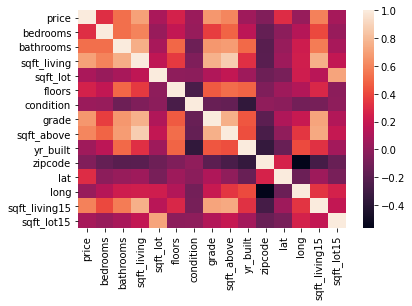

In [22]:
sns.heatmap(corr);

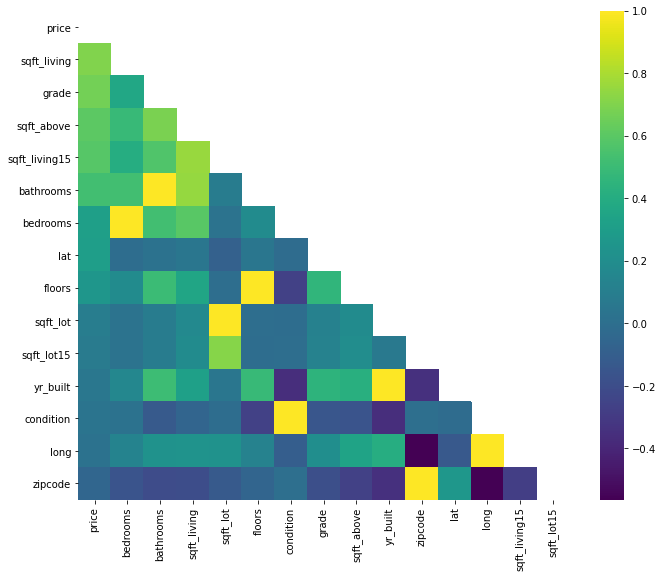

In [23]:
corr = corr.sort_values(by='price', ascending=False)
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

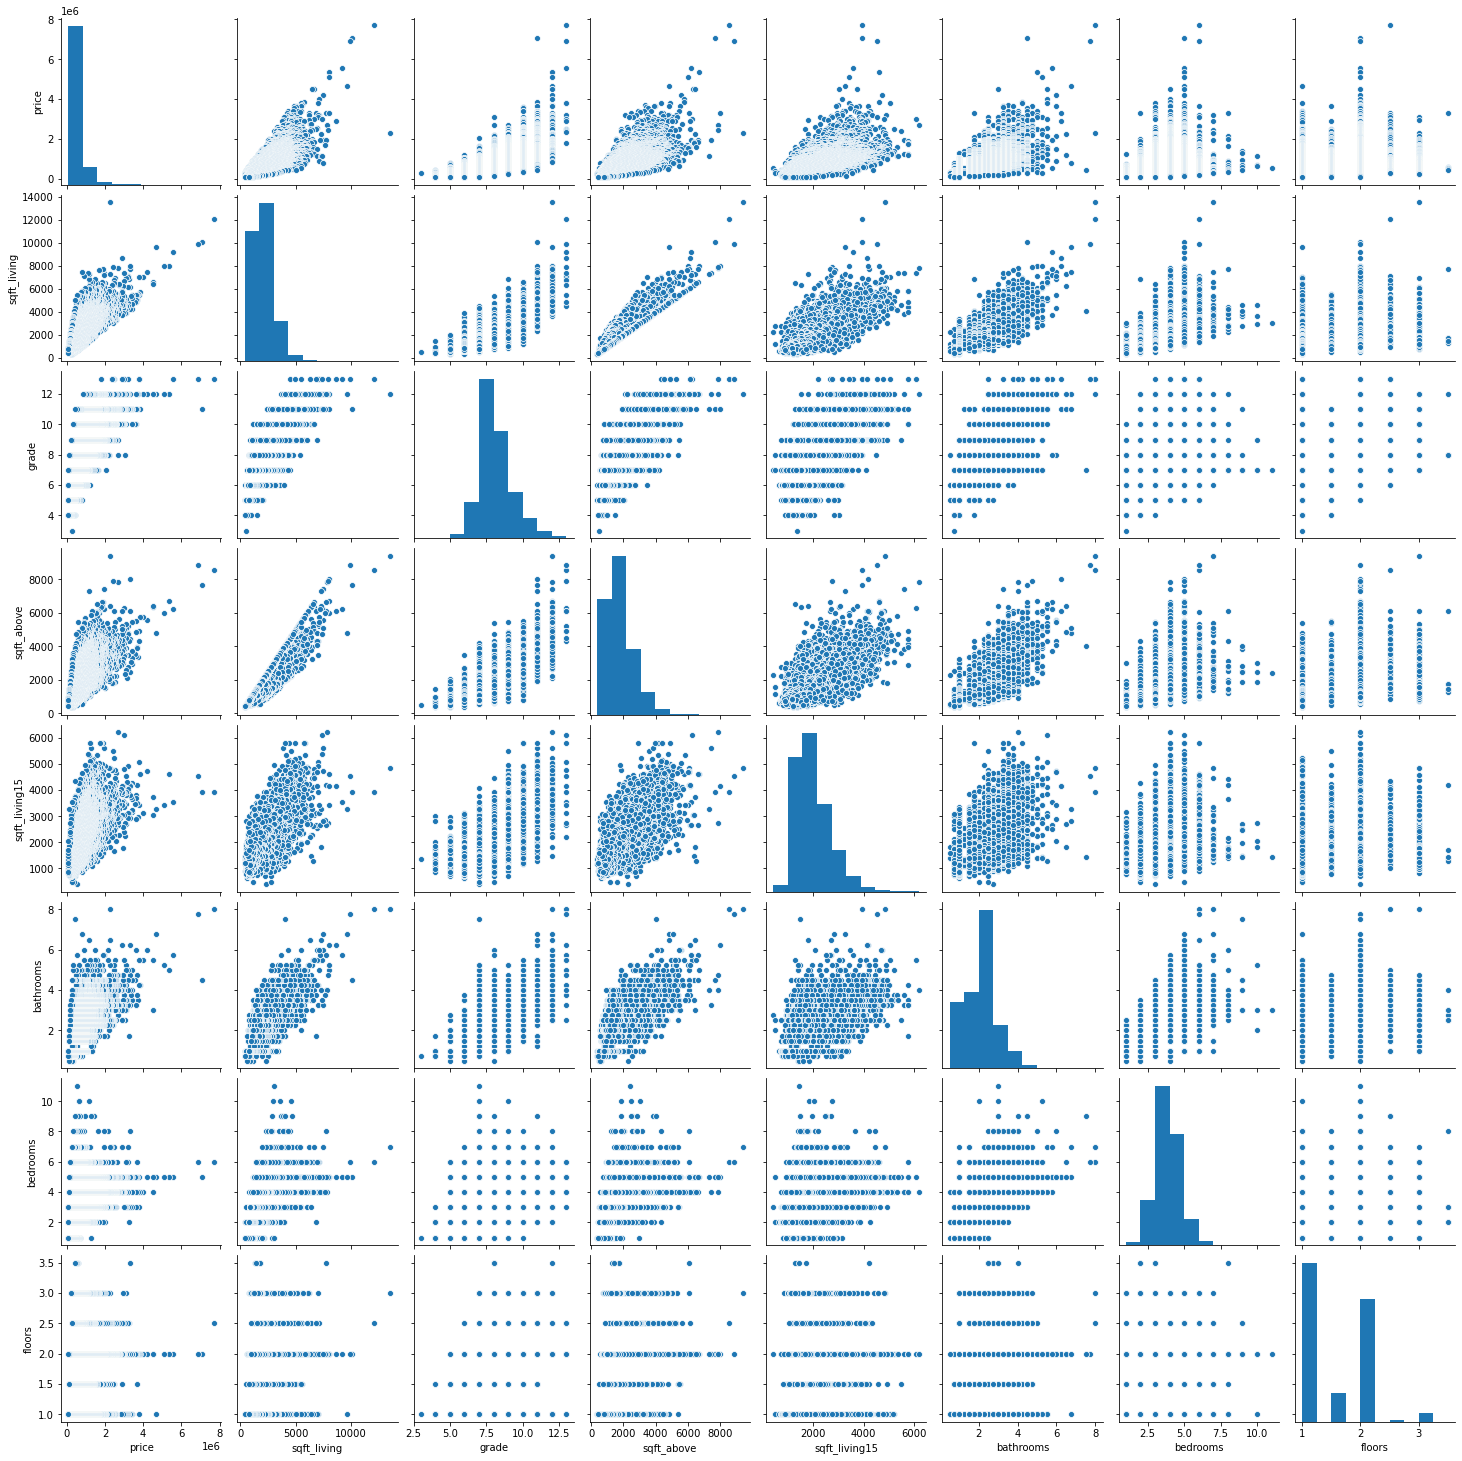

In [24]:
positively_correlated_cols = ['price','sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms', 'floors']
positively_correlated_df = df1[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

## First Simple Model

sqft_living, sqft_above, sqft_living15, bathrooms are highly correlated with price

In [25]:
fsm_df = df1[["sqft_above", "price"]].copy()

In [26]:
fsm = ols(formula="price ~ sqft_above", data=fsm_df)
fsm_results = fsm.fit()

In [27]:
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.248e+04
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:58:22   Log-Likelihood:            -3.0148e+05
No. Observations:               21533   AIC:                         6.030e+05
Df Residuals:                   21531   BIC:                         6.030e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.093e+04   4726.271     12.892      0.000    5.17e+04    7.02e+04
sqft_above   267.8760      2.398    111.703      0.000     263.176     272.576
==============================================================================
Omnibus:                    16222.248   Durbin-Watson:                   0.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           685286.302
Skew:                           3.212   Prob(JB):                         0.00
Kurtosis:                      29.880   Cond. No.                     4.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## First Model Evaluation
49.2% of the sqft_living 

In [28]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 20.842719481869768
Rainbow p-value: 0.0


In [29]:
y = fsm_df["price"]
y_hat = fsm_results.predict()